## 📌 Car Price Prediction — Project Overview

## 🧩 Problem Statement
The goal of this project is to build a high-performance **Gradient Boosting Regressor** to predict the **Selling Price** of used cars. By analyzing features like vehicle age, kilometers driven, fuel type, and transmission, the model provides an accurate valuation of a car in the secondary market.

---

## 📊 Dataset Information

## 🏷️ Dataset Name  
CarDekho Imputed Dataset

## 🌐 Source  
cardekho_imputated.csv

---

## 📐 Dataset Shape
- **Total Rows:** ~15,000+ (Based on typical CarDekho data)
- **Total Columns:** 11 (After cleaning)

---

## 🧬 Dataset Columns
- **model** – The specific model of the car (e.g., Alto, i20, Grand)
- **vehicle_age** – Age of the car in years
- **km_driven** – Total distance covered by the car
- **seller_type** – Type of seller (Individual or Dealer)
- **fuel_type** – Fuel category (Petrol, Diesel, CNG, etc.)
- **transmission_type** – Gear system (Manual or Automatic)
- **mileage** – Fuel efficiency of the vehicle
- **engine** – Engine capacity in CC
- **max_power** – Maximum power output
- **seats** – Number of passenger seats
- **selling_price** – **Target Label** (Price at which the car is sold)

---

## 🎯 Features and Target Used in This Project

## 🔹 Features (X)
We use the following 10 features for prediction:
- model, vehicle_age, km_driven, seller_type, fuel_type, transmission_type, mileage, engine, max_power, and seats.

## 🎯 Target (y)
- **selling_price** (The estimated price of the car)

---

## 📚 Steps Performed in the Notebook

1. **Data Loading:** Reading the `cardekho_imputated.csv` file.
2. **Data Cleaning:** Removing unnecessary columns like `Unnamed: 0` and `car_name`.
3. **Encoding:** Converting categorical features (model, fuel type, etc.) into numerical values using Label Encoding.
4. **Model Building:** Implementing the **Gradient Boosting Regressor**.
5. **Evaluation:** Comparing Training and Testing results using:
   - **MAE** (Mean Absolute Error)
   - **MSE** (Mean Squared Error)
   - **RMSE** (Root Mean Squared Error)
   - **R2 Score** (Coefficient of Determination)

---

## Gradient Boosting Regressior


In [46]:
# Import requirement library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [47]:
## Load the data set 
data=pd.read_csv('cardekho_imputated.csv')
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [48]:
## Checking the missing value 
data.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [49]:
##  Checking the Data types 
data.dtypes

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [50]:
## Remove the unessarary columns 
data.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
data.drop('car_name',axis=1,inplace=True)
data.drop('brand',axis=1,inplace=True)

In [52]:
data.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [53]:
data.shape

(15411, 11)

In [54]:
len(data['model'].unique())

120

In [55]:
data['model'].unique().max()

'redi-GO'

In [56]:
c=data.columns
cnt=0
for i in data['model']:
    if i=='i20':
        cnt+=1
print('Total value of the Redi- Go :',cnt)


Total value of the Redi- Go : 906


In [57]:
data.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [58]:
cat=[]
for i in data.columns:
    if data[i].dtypes=='object':
        cat.append(i)

In [59]:
cat

['model', 'seller_type', 'fuel_type', 'transmission_type']

In [60]:
# Using the LabelEncoder to convert the categorical to numerical 
from sklearn.preprocessing import LabelEncoder

In [61]:
l1=LabelEncoder()

In [62]:
data['model']=l1.fit_transform(data['model'])
data['seller_type']=l1.fit_transform(data['seller_type'])
data['fuel_type']=l1.fit_transform(data['fuel_type'])
data['transmission_type']=l1.fit_transform(data['transmission_type'])

In [63]:
data.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,38,6,30000,0,1,1,22.77,1498,98.59,5,570000


In [64]:
## Divide the data into dependent and independent features
x=data.drop('selling_price',axis=1)
y=data['selling_price']

In [65]:
x.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,1,4,1,19.70,796,46.30,5
1,54,5,20000,1,4,1,18.90,1197,82.00,5
2,118,11,60000,1,4,1,17.00,1197,80.00,5
3,7,9,37000,1,4,1,20.92,998,67.10,5
4,38,6,30000,0,1,1,22.77,1498,98.59,5


<Axes: >

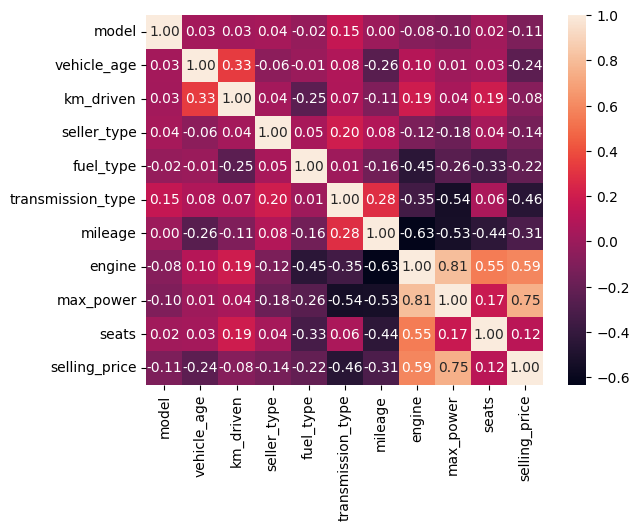

In [66]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [67]:
# divide the data into train and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=42)
x_train.shape,y_train.shape

((11558, 10), (11558,))

In [68]:
## import The Training model for train the Machine Learning Model 
## And ALso import the mean squared error and r2 score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [69]:
## Fit the model to train and test data  and also predict the model accuracy 
import math
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)

mse_train=mean_squared_error(y_pred_train,y_train)
r2_score_train=r2_score(y_pred_train,y_train)
mse_test=mean_squared_error(y_pred_test,y_test)
r2_test=r2_score(y_pred_test,y_test)

print('='*40,'Training Accuracy ','='*40)
print('Mse : ' , mse_train)
print('MAE : ', mean_absolute_error(y_pred_train,y_train))
print('r2_score : ', r2_score_train)
print('rmse : ', math.sqrt(mse_train))
print('='*40,'Testing Accuracy ','='*40)
print('Mse : ', mse_test)
print('MAE : ', mean_absolute_error(y_pred_test,y_test))

print('r2_score : ', r2_test)
print('rmse :',math.sqrt(mse_test))


======================================== Training Accuracy  ========================================
Mse :  40084838616.54689
MAE :  110941.84607062131
r2_score :  0.945667801551715
rmse :  200211.9841981166
======================================== Testing Accuracy  ========================================
Mse :  72063919345.08183
MAE :  128971.09975613422
r2_score :  0.8941943205211648
rmse : 268447.2375441436


In [70]:
## Using the Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV

In [71]:
grd_params={
    'loss':['squared_error','absolute_error', 'huber', 'quantile'],
    'criterion':['friedman_mse','squared_error'],
    
    'max_features':['sqrt','log2'],
    'alpha':[0.001,0.01,0.1,1.0,10.0]
    
}

In [72]:
grd_params

{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
 'criterion': ['friedman_mse', 'squared_error'],
 'max_features': ['sqrt', 'log2'],
 'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

In [73]:
rgrd=RandomizedSearchCV(estimator=gbr,
                       param_distributions=grd_params,
                       n_iter=50,
                       verbose=5,
                       n_jobs=-1)

In [74]:
# rgrd.best_params_

In [75]:
# rgrd.fit(x_train,y_train)

In [76]:
rgrd.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [77]:
## Model Retrain the choose the paraameter
pgrd=GradientBoostingRegressor(max_features= 'sqrt',loss= 'squared_error',criterion= 'friedman_mse', alpha= 0.1)

In [78]:
pgrd.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [79]:
## Predicting the accuracy after the hypermater tuning 
y_pred_train=pgrd.predict(x_train)
y_pred_test=pgrd.predict(x_test)

print('='*40,'Traning Accuracy ' , '='*40)
print('MAE : ' , mean_absolute_error(y_pred_train,y_train))
print('MSE : ' , mean_squared_error(y_pred_train,y_train))
print('RMSE : ', math.sqrt(mean_squared_error(y_pred_train,y_train)))
print('R2 Score : ', r2_score(y_pred_train,y_train))
print('='*40,'Testing Accuracy ' , '='* 40 )
print('MAE : ' , mean_absolute_error(y_pred_test,y_test))
print('MSE : ' , mean_squared_error(y_pred_test,y_test))
print('RMSE : ', math.sqrt(mean_squared_error(y_pred_test,y_test)))
print('R2 Score : ', r2_score(y_pred_test,y_test))

======================================== Traning Accuracy  ========================================
MAE :  116532.96160020519
MSE :  47009889061.98017
RMSE :  216817.64010794918
R2 Score :  0.9349732840014794
======================================== Testing Accuracy  ========================================
MAE :  136043.76943473172
MSE :  89809161892.03137
RMSE :  299681.7677003914
R2 Score :  0.8719292540722803


In [80]:
## save the model for the gradient boosting regressor 
import joblib 
joblib.dump(pgrd,'gradientboostingregressor.pkl')

['gradientboostingregressor.pkl']

In [81]:
## Model evaluation 
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor


In [82]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso ' : Lasso(),
    'Ridge':Ridge(),
    'ElasticNet ' : ElasticNet(),
    'SVR ' : SVR(),
    'Decision Tree : ':DecisionTreeRegressor(),
    'Random Forest : ' : RandomForestRegressor(),
    'Gradient Boosting : ' : GradientBoostingRegressor(),
    'AdaBoosting : ' : AdaBoostRegressor()
}


In [85]:
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)

    print('='*40,'Traning Accuracy ',model , '='*40)
    print('MAE : ' , mean_absolute_error(y_pred_train,y_train))
    print('MSE : ' , mean_squared_error(y_pred_train,y_train))
    print('RMSE : ', math.sqrt(mean_squared_error(y_pred_train,y_train)))
    print('R2 Score : ', r2_score(y_pred_train,y_train))
    print('='*40,'Testing Accuracy ' ,model, '='* 40 )
    print('MAE : ' , mean_absolute_error(y_pred_test,y_test))
    print('MSE : ' , mean_squared_error(y_pred_test,y_test))
    print('RMSE : ', math.sqrt(mean_squared_error(y_pred_test,y_test)))
    print('R2 Score : ', r2_score(y_pred_test,y_test))
    

======================================== Traning Accuracy  LinearRegression() ========================================
MAE :  267025.79873404704
MSE :  305927371444.0813
RMSE :  553107.0162672693
R2 Score :  0.38886472328644517
======================================== Testing Accuracy  LinearRegression() ========================================
MAE :  284411.6805912466
MSE :  271000441327.68726
RMSE :  520577.0272761633
R2 Score :  0.49672890792129953
======================================== Traning Accuracy  Lasso() ========================================
MAE :  267025.91336091
MSE :  305927371461.421
RMSE :  553107.0162829441
R2 Score :  0.38886421775912094
======================================== Testing Accuracy  Lasso() ========================================
MAE :  284411.72425303695
MSE :  271000608341.0915
RMSE :  520577.18768794654
R2 Score :  0.4967282470186063
======================================== Traning Accuracy  Ridge() ========================================
MAE : 